In [488]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [489]:
def load_image(path):
    byte_img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(byte_img,channels=3)
    return img

In [490]:
test_images = tf.data.Dataset.list_files('data-2/*.jpeg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [491]:
img=test_images.shuffle(16)
img=img.batch(8)
img=img.prefetch(4)

In [492]:
from tensorflow.keras.models import load_model
model = load_model('ball-detection.h5')

In [493]:
pred=model.predict(img)

4/4 [==============================] - 4s 777ms/step


In [494]:
img.as_numpy_iterator().next()[0]

array([[[0.3647059 , 0.37745097, 0.39509803],
        [0.36568627, 0.38137254, 0.39117646],
        [0.34019607, 0.35588235, 0.35784313],
        ...,
        [0.3127451 , 0.3480392 , 0.38333333],
        [0.3127451 , 0.3480392 , 0.38333333],
        [0.32156864, 0.35686275, 0.39215687]],

       [[0.3529412 , 0.36862746, 0.37843138],
        [0.3529412 , 0.36862746, 0.37254903],
        [0.33039215, 0.34705883, 0.34215686],
        ...,
        [0.26568627, 0.3009804 , 0.32843137],
        [0.27254903, 0.30784315, 0.33529413],
        [0.29509804, 0.33039215, 0.35784313]],

       [[0.32352942, 0.3392157 , 0.34117648],
        [0.32647058, 0.34313726, 0.3382353 ],
        [0.30686274, 0.32647058, 0.30392158],
        ...,
        [0.24411765, 0.27941176, 0.30686274],
        [0.25196078, 0.2872549 , 0.31470588],
        [0.26862746, 0.30392158, 0.33137256]],

       ...,

       [[0.55      , 0.63235295, 0.22254902],
        [0.55490196, 0.6372549 , 0.22941177],
        [0.5617647 , 0

1/1 [==============================] - 1s 971ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


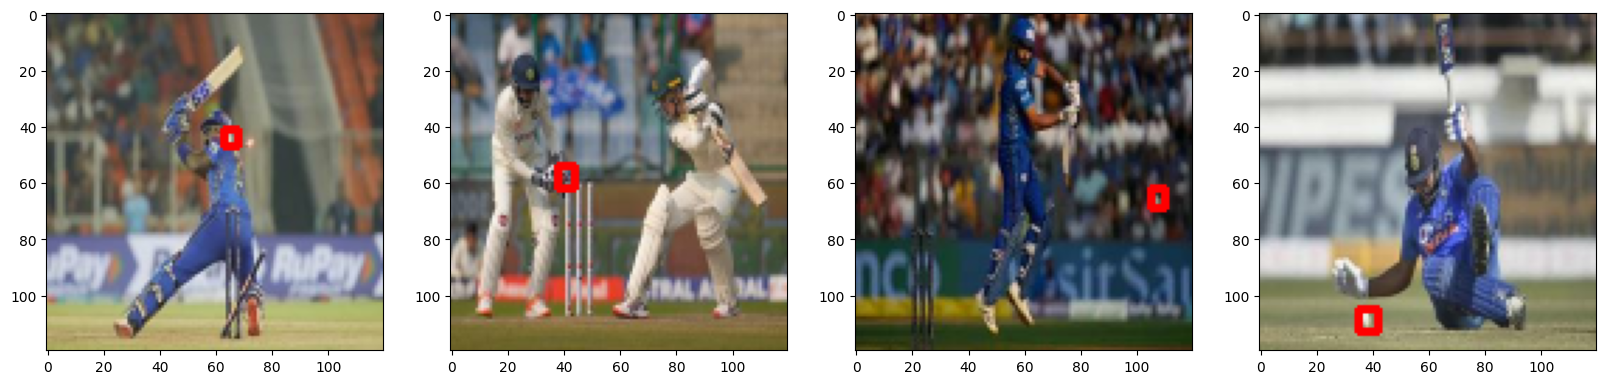

In [495]:
test_data = img.as_numpy_iterator()
test_sample = test_data.next()
yhat = model.predict(test_sample)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
yhat
for idx in range(4): 
    sample_image = test_sample[idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)